## Estimativa dos níveis de obesidade com base nos hábitos alimentares e na condição física

| Nome da Variável                     | Tipo         | Descrição                                                                 |
|--------------------------------------|-------------|---------------------------------------------------------------------------|
| Gender                               | Categórico  | Gênero                                                                    |
| Age                                  | Contínuo    | Idade                                                                     |
| Height                               | Contínuo    | Altura                                                                    |
| Weight                               | Contínuo    | Peso                                                                      |
| family_history_with_overweight       | Binário     | Algum membro da família já sofreu ou sofre de sobrepeso?                  |
| FAVC                                 | Binário     | Você consome alimentos altamente calóricos frequentemente?                 |
| FCVC                                 | Inteiro     | Você costuma comer vegetais nas suas refeições?                           |
| NCP                                  | Contínuo    | Quantas refeições principais você faz por dia?                            |
| CAEC                                 | Categórico  | Você come algum alimento entre as refeições?                             |
| SMOKE                                | Binário     | Você fuma?                                                                |
| CH2O                                 | Contínuo    | Quantos litros de água você bebe diariamente?                             |
| SCC                                  | Binário     | Você monitora as calorias que consome diariamente?                        |
| FAF                                  | Contínuo    | Com que frequência você pratica atividade física?                         |
| TUE                                  | Inteiro     | Quanto tempo você usa dispositivos tecnológicos (celular, TV, etc.)?      |
| CALC                                 | Categórico  | Com que frequência você consome bebidas alcoólicas?                       |
| MTRANS                               | Categórico  | Qual meio de transporte você utiliza normalmente?                         |
| NObeyesdad                           | Categórico  | Nível de obesidade                                                        |

In [2]:
# importing dataset
import pandas as pd

# reading the csv file
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# displaying the first 5 rows of the dataset
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [3]:
# show number of rows and columns in the dataset
print(f"Quantidade de dados: {df.shape[0]}")
print(f"Dimensão: {df.shape[1]}")

Quantidade de dados: 2111
Dimensão: 17


## Verificação de dados ausentes

In [4]:
# Verificar dados faltantes
missing_values = df.isnull().sum()

# Verificar tipos de dados
data_types = df.dtypes

# Resumo estatístico das variáveis numéricas
numeric_summary = df.describe()

missing_values, data_types, numeric_summary

(Gender                            0
 Age                               0
 Height                            0
 Weight                            0
 family_history_with_overweight    0
 FAVC                              0
 FCVC                              0
 NCP                               0
 CAEC                              0
 SMOKE                             0
 CH2O                              0
 SCC                               0
 FAF                               0
 TUE                               0
 CALC                              0
 MTRANS                            0
 NObeyesdad                        0
 dtype: int64,
 Gender                             object
 Age                               float64
 Height                            float64
 Weight                            float64
 family_history_with_overweight     object
 FAVC                               object
 FCVC                              float64
 NCP                               float64
 CAEC       

## Preparação dos dados

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Remover a variável alvo (NObeyesdad) pois clusterização é não supervisionada
df_clustering = df.drop(columns=["NObeyesdad"])

# Separar variáveis numéricas e categóricas
numeric_features = df_clustering.select_dtypes(include=["float64"]).columns
categorical_features = df_clustering.select_dtypes(include=["object"]).columns

# Normalizar variáveis numéricas
scaler = StandardScaler()
df_clustering[numeric_features] = scaler.fit_transform(df_clustering[numeric_features])

# Codificar variáveis categóricas
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_categorical = encoder.fit_transform(df_clustering[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out())

# Concatenar os dados normalizados e codificados
df_preprocessed = pd.concat([df_clustering[numeric_features], encoded_categorical_df], axis=1)

# Exibir as primeiras linhas do dataset transformado
df_preprocessed.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Testar diferentes números de clusters
silhouette_scores = {}
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_preprocessed)
    silhouette_avg = silhouette_score(df_preprocessed, labels)
    silhouette_scores[k] = silhouette_avg

# Exibir os resultados
silhouette_scores

{2: np.float64(0.13339862694561108),
 3: np.float64(0.13357028886526195),
 4: np.float64(0.15442302155207985),
 5: np.float64(0.14071485997823888),
 6: np.float64(0.14760475138826662),
 7: np.float64(0.1495079306632684),
 8: np.float64(0.14167293098862896),
 9: np.float64(0.1472087627168057),
 10: np.float64(0.14969163492514792)}

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Testar diferentes números de clusters
silhouette_scores = {}
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_preprocessed)
    silhouette_avg = silhouette_score(df_preprocessed, labels)
    silhouette_scores[k] = silhouette_avg

# Exibir os resultados
print(silhouette_scores)

{2: np.float64(0.13339862694561108), 3: np.float64(0.13357028886526195), 4: np.float64(0.15442302155207985), 5: np.float64(0.14071485997823888), 6: np.float64(0.14760475138826662), 7: np.float64(0.1495079306632684), 8: np.float64(0.14167293098862896), 9: np.float64(0.1472087627168057), 10: np.float64(0.14969163492514792)}


In [8]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Configurar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(df_preprocessed)

# Verificar quantos clusters foram encontrados (ignorar -1 que representa outliers)
num_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

# Calcular Índice de Silhueta apenas se houver mais de 1 cluster
if num_clusters > 1:
    silhouette_dbscan = silhouette_score(df_preprocessed, labels_dbscan)
else:
    silhouette_dbscan = "DBSCAN identificou apenas um cluster ou muitos outliers."

print(f"Número de Clusters encontrados: {num_clusters}")
print(f"Índice de Silhueta: {silhouette_dbscan}")


Número de Clusters encontrados: 27
Índice de Silhueta: -0.2130387308845396


Text(0, 0.5, 'PCA Component 2')

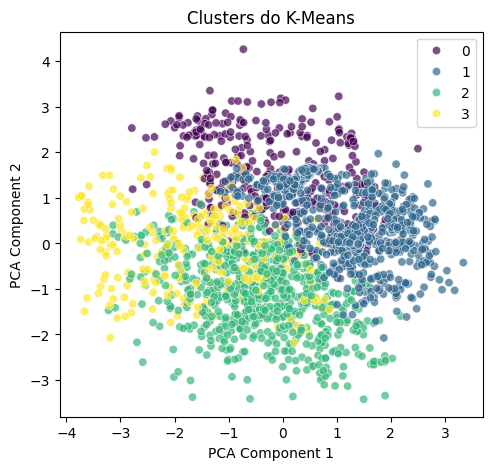

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

# Reduzir os dados para 2 dimensões para visualização
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed)

# Aplicar K-Means novamente para obter os rótulos
best_k = 4  # Melhor número de clusters encontrado anteriormente
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(df_preprocessed)

# Aplicar DBSCAN novamente
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(df_preprocessed)

# Visualizar K-Means
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_kmeans, palette="viridis", alpha=0.7)
plt.title("Clusters do K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

Cluster 0 → Jovens com sobrepeso e baixa atividade física.

Cluster 1 → Adultos com peso elevado, pouca atividade física, mas alimentação moderada.

Cluster 2 → Pessoas mais ativas, com peso menor e alimentação balanceada.

Cluster 3 → Pessoas mais baixas, sedentárias e com hábitos alimentares ruins.

## Parte II

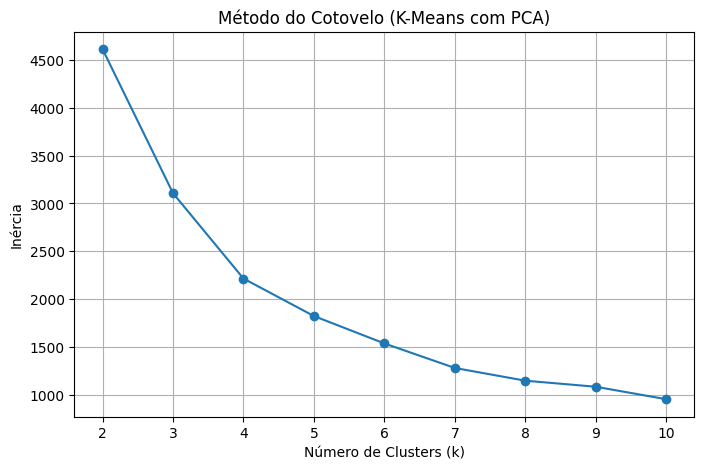

Índice de Silhueta (K-Means com PCA): 0.3710


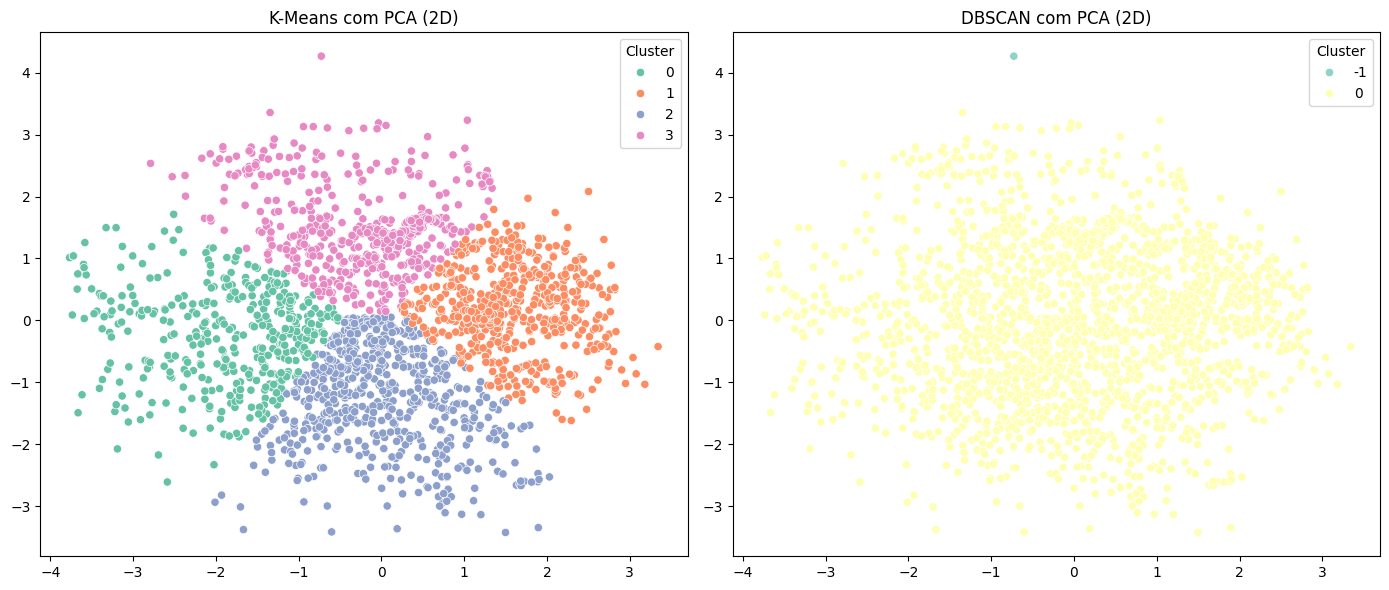

In [29]:
from sklearn.metrics import silhouette_score

# Aplicar PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_preprocessed)

# Aplicar KMeans com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_pca)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_pca)


inertia_values = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Use os dados reduzidos por PCA
    inertia_values.append(kmeans.inertia_)

# Plot do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title("Método do Cotovelo (K-Means com PCA)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.grid(True)
plt.show()


# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


# 1. Calcula o índice de silhueta com os dados reduzidos por PCA
silhouette_kmeans_pca = silhouette_score(X_pca, clusters_kmeans)
print(f"Índice de Silhueta (K-Means com PCA): {silhouette_kmeans_pca:.4f}")

# KMeans
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_kmeans, palette="Set2", ax=axes[0])
axes[0].set_title("K-Means com PCA (2D)")
axes[0].legend(title="Cluster")

# DBSCAN
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_dbscan, palette="Set3", ax=axes[1])
axes[1].set_title("DBSCAN com PCA (2D)")
axes[1].legend(title="Cluster")

plt.tight_layout()
plt.show()

Índice de Silhueta (KMeans com SVD): 0.0577


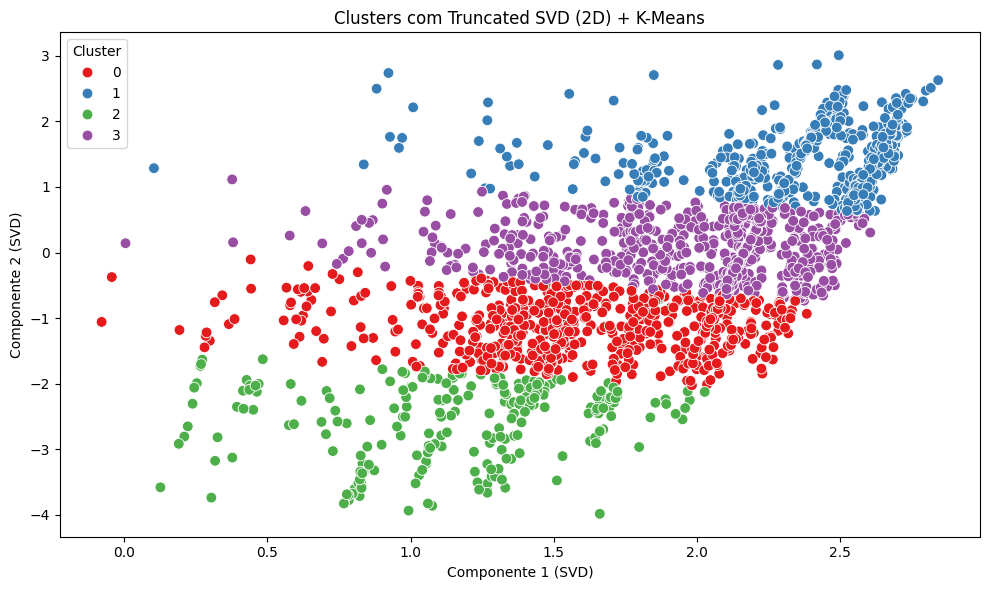

In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Redução de dimensionalidade com SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(df_preprocessed)

# Clusterização com KMeans
kmeans_svd = KMeans(n_clusters=4, random_state=42)
clusters_svd = kmeans_svd.fit_predict(X_svd)

# Índice de Silhueta
silhouette_svd = silhouette_score(df_preprocessed, clusters_svd)
print(f"Índice de Silhueta (KMeans com SVD): {silhouette_svd:.4f}")

# Visualização
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=clusters_svd, palette="Set1", s=60)
plt.title("Clusters com Truncated SVD (2D) + K-Means")
plt.xlabel("Componente 1 (SVD)")
plt.ylabel("Componente 2 (SVD)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


## Comparação dos Métodos de Clusterização (K-Means)

| Técnica de Redução          | Índice de Silhueta | Observações                                                                 |
|-----------------------------|---------------------|------------------------------------------------------------------------------|
| **Sem Redução (Raw Features)** | **0.1500**          | Silhueta baixa. Clusters não bem definidos nas features originais.           |
| **PCA (2D)**                | **0.3710**          | Boa separação entre clusters. PCA ajudou na estruturação dos dados.         |
| **SVD (2D)**                | **0.0577**          | Clusters visivelmente distintos em 2D, mas índice de silhueta muito baixo.  |
